# Planteamiento del problema

Considere dos osciladores acoplados, de masas idénticas y  conectadas mediante tres resortes de constantes elásticas $k_1, k_2, k_3$. Como se muestra en la figura.





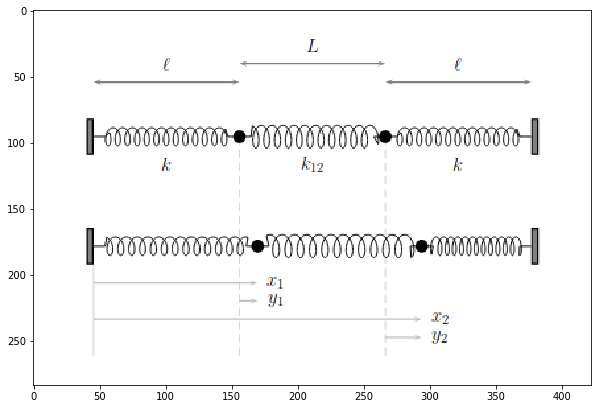

# Su tarea será:

1. Considerar un sistema de dos osciladores acoplados, con constantes elásticas $k_1=k_3$,  $k_2$ y construir un programa que permita realizar los cálculos anteriores de forma sistemática. Es decir, se deberá resolver el problema de autovalores y autovectores, para encontrar las frecuencias de oscilación y la matriz diagonal. La ecuación diferencial  para $\eta$,  deberá ser resuelta  numéricamente y comparada con la solución análitica, la cual viene dada por: 


\begin{equation}
\eta_1(t)=\eta_1(0)\cos(\omega_1t)+ \frac{\dot{\eta_1}(0)}{\omega_1}\sin(\omega_1t)
\end{equation}

\begin{equation}
\eta_2(t)=\eta_2(0)\cos(\omega_2t)+ \frac{\dot{\eta_2}(0)}{\omega_2}\sin(\omega_2t)
\end{equation}

y empleando: 

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}


\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}
tenemos que la solución exacta, al problema viene dada por: 

\begin{equation}
x_1(t)=\frac{1}{2}(x_1(0)-x_2(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_1}(0)-\dot{x_2}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}

\begin{equation}
x_2(t)=\frac{1}{2}(x_2(0)-x_1(0))\cos\omega_1 t+\frac{1}{2\omega_1}(\dot{x_2}(0)-\dot{x_1}(0))\sin\omega_1t+\\
\frac{1}{2}(x_1(0)+x_2(0))\cos\omega_2 t+\frac{1}{2\omega_2}(\dot{x_1}(0)+\dot{x_2}(0))\sin\omega_2t
\end{equation}


La ecuacion anterior tiene solución según las condiciones iniciales. Muestre que la solucion numérica coincide con la analíítica, para ello, realice graficas de ambas soluciones y comparelas, cuando considera  la evolución temporal de $x_1$, $x_2$ para las siguientes condiciones:

- **Modo simétrico:** $x_1(0) = x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
- **Modo antisimétrico:** $x_1(0)=-x_2(0) = A$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
-  $x_1(0)=A, x_2(0) = 0$, $\dot{x_1}(0)=\dot{x_2}(0) = 0$ 



2. Para el última condición, suponga que el acoplamiento es debil, es decir $k_2<<k$. ¿Cómo es la evolucion temporal de $x_1$ y $x_2$ en este caso?.

3. ¿Qué puede concluir de sus resultados?

4.  Generalizar el problema, para constantes elásticas de los resortes $k_1, k_2, k_3$ y masas de $m_1, m_2, m_3$.

5. Realice una animación del movimiento de las particulas en el espacio, segun los resultados obtenidos.




**RETO 1** Considere ahora, un sistema con amortiguamiento proporcional a la velocidad, las ecuaciones de movimiento, 
vienen dadas por:

\begin{equation}
m\ddot{y_1} + \gamma \dot{y_1} + (k +k_2) y_1 - k_2 y_2 = 0
\end{equation}


\begin{equation}
m\ddot{y_2} + \gamma \dot{y_2} + (k +k_2) y2 - k_2 y_1 = 0
\end{equation}

Estudiar en este caso, la evolucion temporal de cada masa para diferentes condiciones. 

**RETO 2** Considere 10 osciladores acoplados, ¿Qué tipo de soluciones se pueden obtener este caso?




# Solucion
### Primero creamos una funcion que calcule los $w_1,w_2$ teniendo en cuenta que los autovalores de la matriz son las frecuencias por la masa, es decir, $\lambda = mw^2$

Ademas se usa el cambio en la ecuación
\begin{equation}
\ddot{\eta_i}+\omega_i^2\eta_i=0, i = 1,2
\end{equation}
Con
\begin{equation}
\frac{d\eta}{dt} = v
\end{equation}
\begin{equation}
\mathrm{d}v = -w_i\eta_i
\end{equation}

In [1]:
import numpy as np
import scipy.linalg as la 
from scipy.integrate import odeint

from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib import rc

from IPython.display import HTML
rc('animation', html='html5')

In [2]:
def W(k1,k2,k3,m1,m2): # Funcion que calcula las frecuencias usando las masas y 
  A = np.matrix([[k1+k2,-k2],[-k2,k2+k3]]) # Las constantes de los osciladores
  E, U = la.eig(A) # Se usan los autovalores para hallar las frecuencias
  w1= np.sqrt(E[0].real/m1)
  w2 = np.sqrt(E[1].real/m2)
  return w1,w2

def derivate(h,t,params): # Funcion que calcula la segunda derivada de eta
  v = h[1]
  w = params[0]
  dvdt = -w**2*h[0]
  return [v,dvdt]

## Usando las ecuaciones

\begin{equation}
x_1=\frac{1}{\sqrt{2}}(\eta_1+\eta_2)
\end{equation}

\begin{equation}
x_2=\frac{1}{\sqrt{2}}(\eta_2+\eta_1)
\end{equation}
## Podemos hallar

\begin{equation}
\eta_1=\frac{1}{\sqrt{2}}(x_1-x_2)
\end{equation}

\begin{equation}
\eta_2=\frac{1}{\sqrt{2}}(x_2+x_1)
\end{equation}

In [3]:
def real_x1(t,w1,w2,x_0,x_deriv_0): # Con esta funcion hallamos el valor teorico
  x1, x2 = x_0      # De un x_1 para ciertos valores iniciales  
  x_prime_1, x_prime_2 = x_deriv_0
  part_1 = (x1-x2)*np.cos(w1*t)
  part_2 = (x_prime_1-x_prime_2)*np.sin(w1*t)/w1
  part_3 = (x1+x2)*np.cos(w2*t)
  part_4 = (x_prime_1+x_prime_2)*np.sin(w2*t)/w2
  return (part_1+part_2+part_3+part_4)/2

def real_x2(t,w1,w2,x_0,x_deriv_0): # De igual manera se hace con x_2, la funcion
  x1, x2 = x_0  # Se separa en partes para mayor facilidad de calculo
  x_prime_1, x_prime_2 = x_deriv_0
  part_1 = (x2-x1)*np.cos(w1*t)
  part_2 = (x_prime_2-x_prime_1)*np.sin(w1*t)/w1
  part_3 = (x1+x2)*np.cos(w2*t)
  part_4 = (1/w2)*(x_prime_1+x_prime_2)*np.sin(w2*t)
  return (part_1+part_2+part_3+part_4)/2

def et(t,et_init, deriv_et_init, w): # Calcula el valor teorico de las eta
  return et_init*np.cos(w*t)+(deriv_et_init/w)*np.sin(w*t)

In [4]:
def mov(m1,m2,k1,k2,k3,x_0): # La funcion que calcula el movimiento de eta y con 
  x1_0, x2_0 = x_0  # La que se hacen los calculos numericos
  w1,w2 = W(k1,k2,k3,m1,m2) # Primero se hallan los valores de w1 y w2
  t = np.linspace(0 , 8, 1000) # Se escoge un rango de tiempo
  h10 = [(x1_0-x2_0)/np.sqrt(2), 1e-16] # Se calcula eta_1 y eta_2 en base a las
  h20 = [(x1_0+x2_0)/np.sqrt(2), 1e-16] # Formulas halladas
  param_1 = [w1]
  etas_1 = odeint(derivate,h10,t,args=(param_1,)) # Se usa odeint para solucionar
  eta_1 = etas_1[:,0]  # La ecuacion diferencial
  param_2 = [w2]
  etas_2 = odeint(derivate,h20,t,args=(param_2,))
  eta_2 = etas_2[:,0] 
  return eta_1,eta_2,h10,h20 # Se devuelven los valores de posicion para eta1,
    # eta2 y los valores iniciales de las etas de la forma [posicion, velocidad]

### Funciones para graficar

In [5]:
def plot_eta(t, eta1, real1, eta2, real2):
  plt.figure(figsize=(10,10))
  plt.subplot(211)
  plt.title(r"Comparacion entre $\eta_1$ y el valor real")
  plt.plot(t,eta1, label = "numerico", alpha = 0.7)
  plt.plot(t,real1, label = "real", alpha = 0.7)
  plt.legend()
  plt.subplot(212)
  plt.title(r"Comparacion entre $\eta_2$ y el valor real")
  plt.plot(t,eta2, label = "numerico", alpha = 0.7)
  plt.plot(t,real2, label = "real", alpha = 0.7)
  plt.legend()
def plot_error(t, eta1, real1, eta2, real2):
  plt.figure(figsize=(10,10))
  plt.subplot(211)
  plt.title(r"Error absoluto a traves del tiempo entre $\eta_1$ y el valor real")
  plt.plot(t,abs(eta1-real1))
  plt.subplot(212)
  plt.title(r"Error absoluto a traves del tiempo entre $\eta_2$ y el valor real")
  plt.plot(t,abs(eta2-real2))
def plot_x(t,x,real,n ):
  string = "$x_{}$".format(n)
  plt.figure(figsize=(10,10))
  plt.subplot(211)
  plt.title(r"Comparacion entre "+string+" real y su valor numerico")
  plt.plot(t,x, "r-", alpha = 0.5, label = "valor numerico")
  plt.plot(t,real, "b-", alpha = 0.5, label = "valor real")
  plt.legend()
  plt.subplot(212)
  plt.title(r"Error absoluto entre las comparaciones de "+string)
  plt.plot(t,abs(x-real))

### Animacion


In [6]:
def animate(w1,w2,x_inicial,x_deriv_0):
  fig, ax = plt.subplots(figsize=(8,8))

  ax.set_xlim((-8,15))
  ax.set_ylim((-2,2))
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_title('Movimiento')
  pt1, = ax.plot([], [], 'g.', ms=20, alpha = 0.5)
  pt2, = ax.plot([], [], "r.", ms=20, alpha = 0.5)
  def drawframe(time):
    x1 = real_x1(time,w1,w2,x_inicial,x_deriv_0)
    x2 = real_x2(time,w1,w2,x_inicial,x_deriv_0)
    pt1.set_data(x1,0)
    pt2.set_data(10 + x2,0)
    return pt1,pt2
  return FuncAnimation(fig, drawframe, frames=t, interval=20)

## Simetrico
$x_1(0) = x_2(0) = A, \\
\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
#### Entonces

$\eta_1(0) = 0, \eta_2(0) = \sqrt(2)A, \\
\dot{\eta_1}(0) = 0, \dot{\eta_2}(0) = 0$ 

In [7]:
t = np.linspace(0,8,1000)
m1 = 1  # Se aplican ciertos valores a las constantes, sin embargo lo importante  
m2 = 1  # Es que k1= k3 y m1= m2
k1 = 2
k2 = 1
k3 = 2
A = 3
x_inicial = [A,A] #Por ultimo tambien se deben hacer que x_1 = x_2
eta_1,eta_2,h10,h20 = mov(m1,m2,k1,k2,k3,x_inicial)
w1,w2 = W(k1,k2,k3,m1,m2) # Se hallan las frecuencias con los valores obtenidos
real_eta_1 = et(t,h10[0],h10[1],w1) # calculo de las eta reales con la formula
real_eta_2 = et(t,h20[0],h20[1],w2)

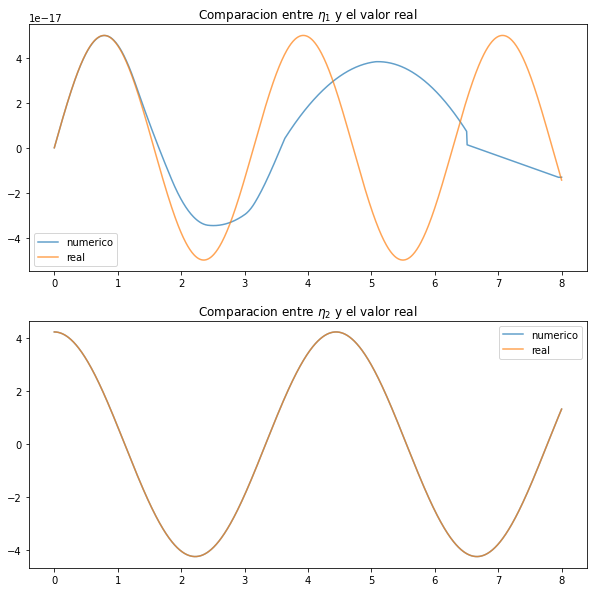

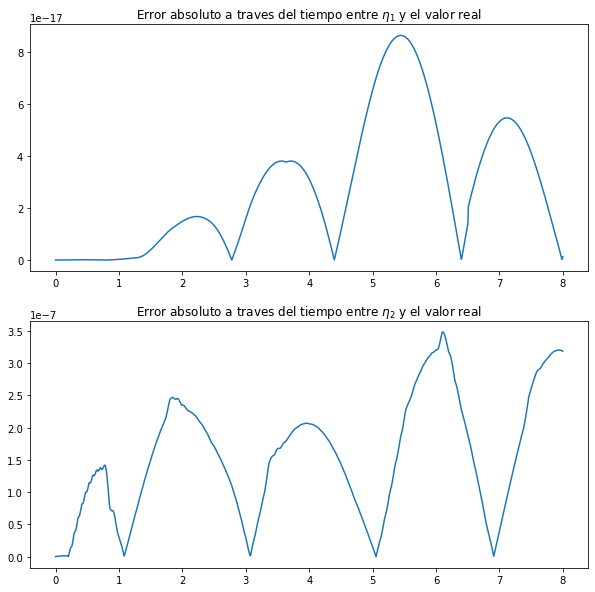

In [8]:
plot_eta(t, eta_1, real_eta_1, eta_2,real_eta_2)
plot_error(t, eta_1, real_eta_1, eta_2, real_eta_2)

In [9]:
x_deriv_0 = [0,0] # Velocidad inicial es cero
x1 = (1/np.sqrt(2))*(eta_1+eta_2) # Se hallan los valores numericos de x
x2 = (1/np.sqrt(2))*(eta_2-eta_1) # Con los previos de eta
real_x_1 = real_x1(t,w1,w2,x_inicial,x_deriv_0) # Funcion que calcula la x real con el 
real_x_2 = real_x2(t,w1,w2,x_inicial,x_deriv_0) # Resultado teorico

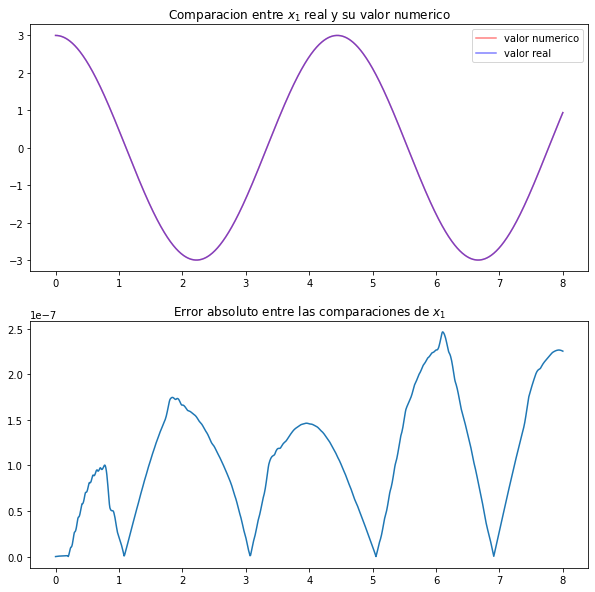

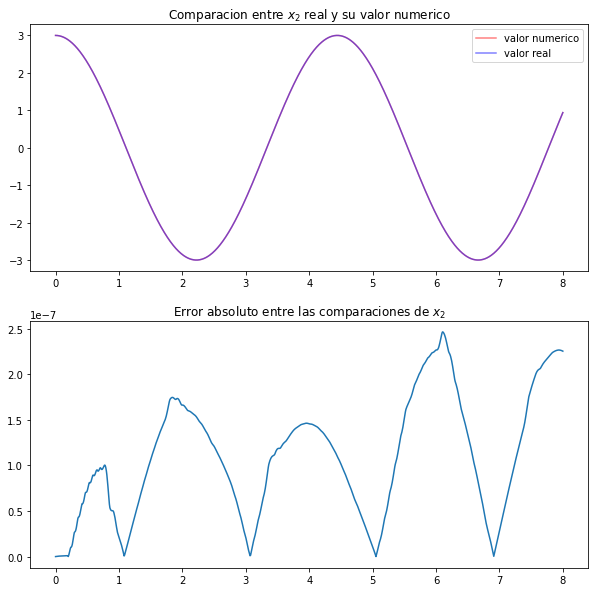

In [10]:
plot_x(t,x1,real_x_1,1)
plot_x(t,x2,real_x_2,2)

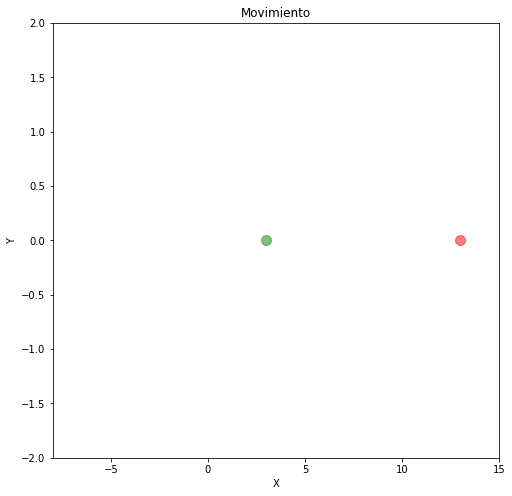

In [11]:
anim = animate(w1,w2,x_inicial,x_deriv_0)
HTML(anim.to_html5_video())

## Antisimetrico
$x_1(0) = -x_2(0) = A, \\
\dot{x_1}(0)=\dot{x_2}(0) = 0$ 
#### Entonces

$\eta_1(0) = A\sqrt(2), \eta_2(0) = 0, \\
\dot{\eta_1}(0) = 0, \dot{\eta_2}(0) = 0$ 

In [12]:
x_inicial= [A,-A]
eta_1,eta_2,h10,h20 = mov(m1,m2,k1,k2,k3,x_inicial)
w1,w2 = W(k1,k2,k3,m1,m2)
real_eta_1 = et(t,h10[0],h10[1],w1)
real_eta_2 = et(t,h20[0],h20[1],w2)

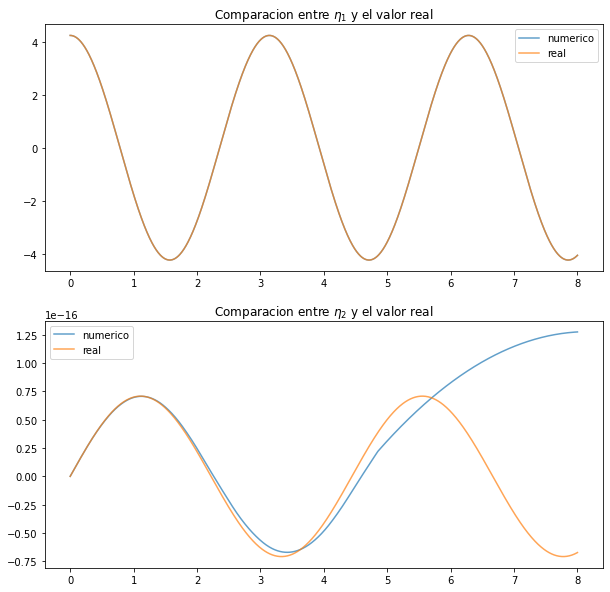

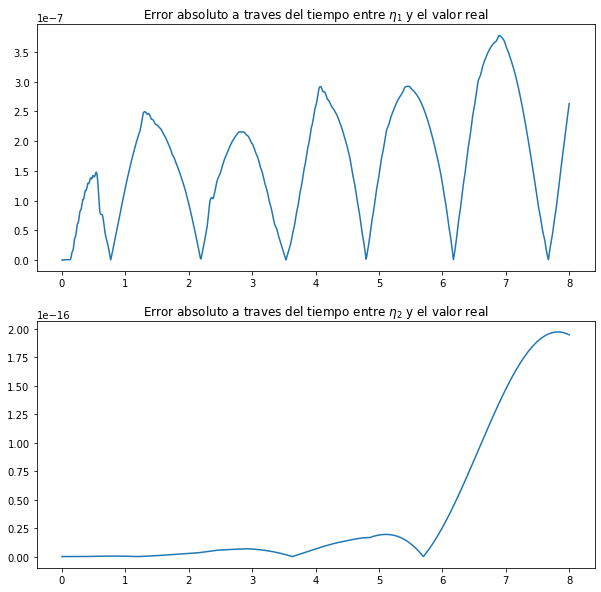

In [13]:
plot_eta(t, eta_1, real_eta_1, eta_2,real_eta_2)
plot_error(t, eta_1, real_eta_1, eta_2, real_eta_2)

In [14]:
x_deriv_0 = [0,0] 
x1 = (1/np.sqrt(2))*(eta_1+eta_2) 
x2 = (1/np.sqrt(2))*(eta_2-eta_1) 
real_x_1 = real_x1(t,w1,w2,x_inicial,x_deriv_0)
real_x_2 = real_x2(t,w1,w2,x_inicial,x_deriv_0) 

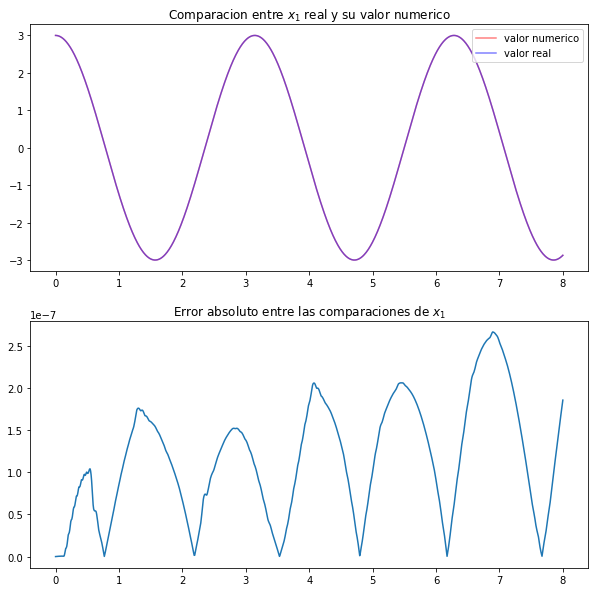

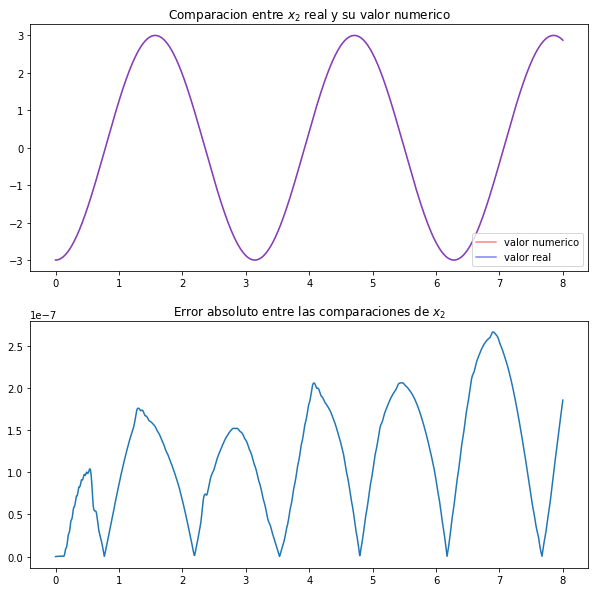

In [15]:
plot_x(t,x1,real_x_1,1)
plot_x(t,x2,real_x_2,2)

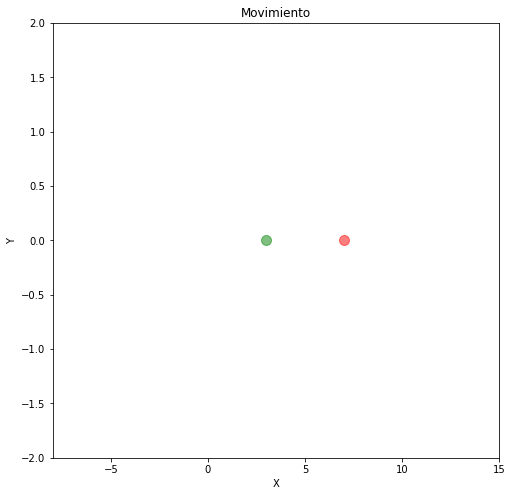

In [16]:
anim = animate(w1,w2,x_inicial,x_deriv_0)
HTML(anim.to_html5_video())

## Caso $k_2 << k$

In [17]:
x_inicial= [A,0]
k2 = k1/100000
eta_1,eta_2,h10,h20 = mov(m1,m2,k1,k2,k3,x_inicial)
w1,w2 = W(k1,k2,k3,m1,m2)
real_eta_1 = et(t,h10[0],h10[1],w1)
real_eta_2 = et(t,h20[0],h20[1],w2)

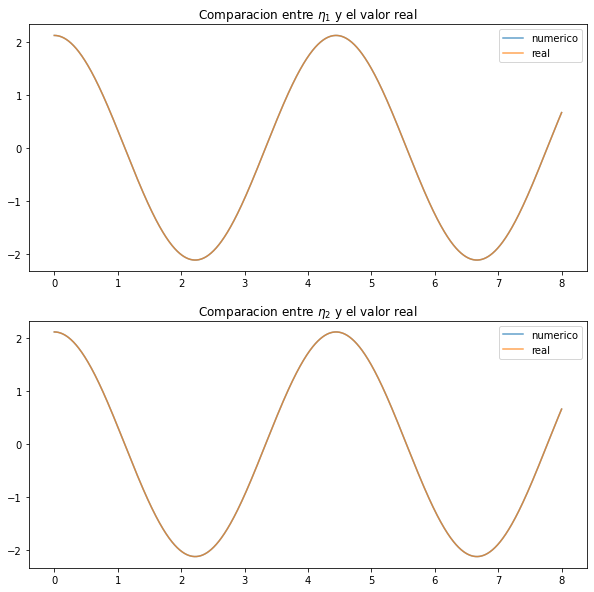

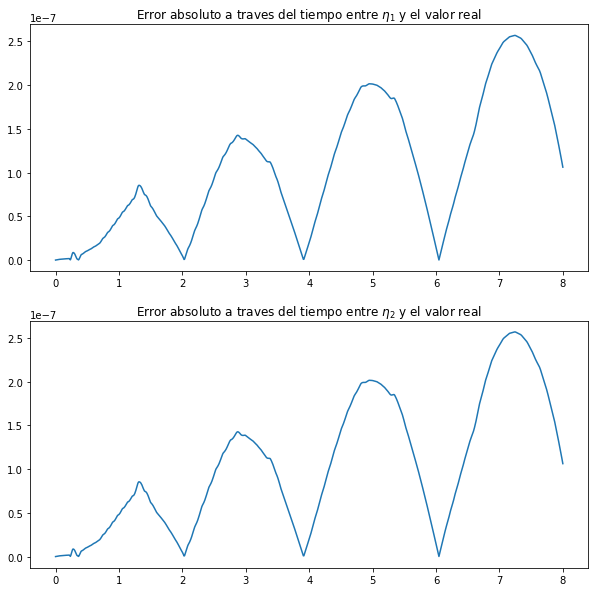

In [18]:
plot_eta(t, eta_1, real_eta_1, eta_2,real_eta_2)
plot_error(t, eta_1, real_eta_1, eta_2, real_eta_2)

In [19]:
x_deriv_0 = [0,0] 
x1 = (1/np.sqrt(2))*(eta_1+eta_2) 
x2 = (1/np.sqrt(2))*(eta_2-eta_1) 
real_x_1 = real_x1(t,w1,w2,x_inicial,x_deriv_0)
real_x_2 = real_x2(t,w1,w2,x_inicial,x_deriv_0) 

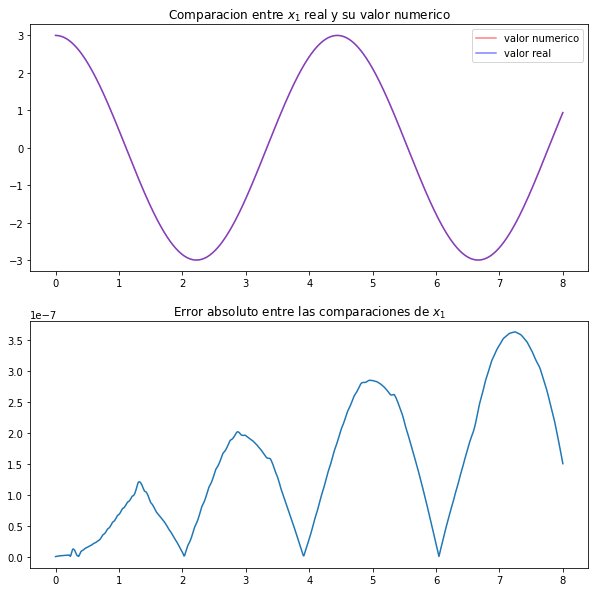

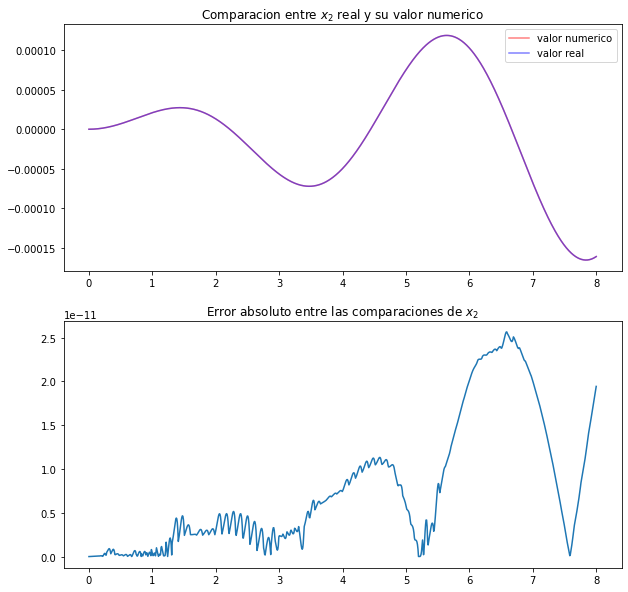

In [20]:
plot_x(t,x1,real_x_1,1)
plot_x(t,x2,real_x_2,2)

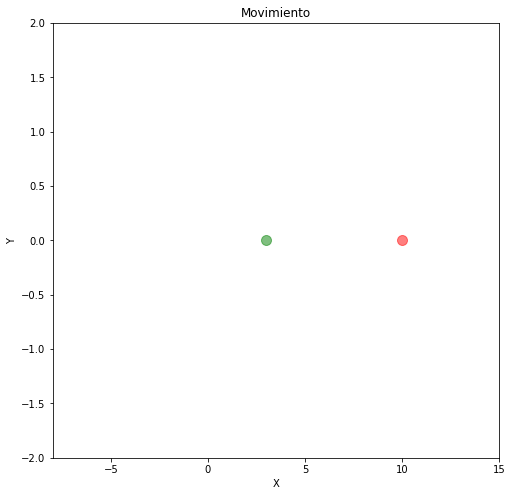

In [21]:
anim = animate(w1,w2,x_inicial,x_deriv_0)
HTML(anim.to_html5_video())